El valor de C en clf1: 
10000000000.0
El valor de C en clf2: 
10000000000.0
Dataset 1: w = [1. 1.], b = -1.0
Dataset 2: w = [-1.  0.], b = -0.0


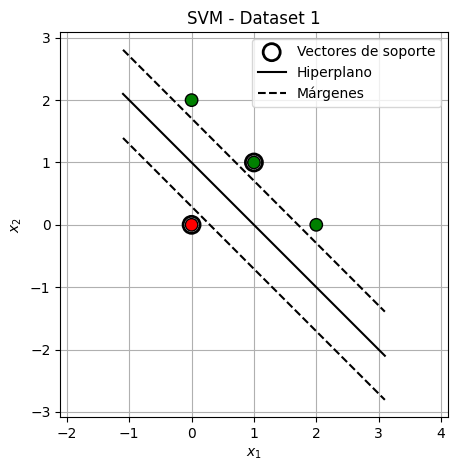

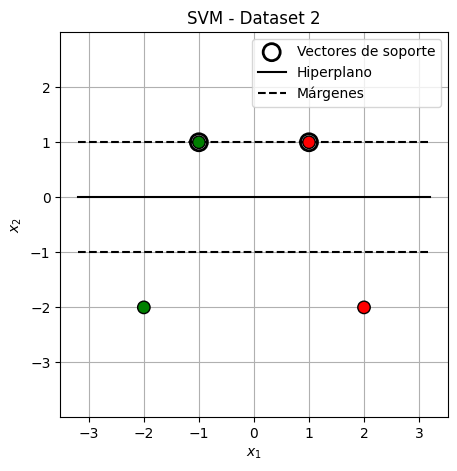

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

def plot_svm(clf, X, y, title):
    plt.figure(figsize=(5, 5))
    colors = ['red' if label == -1 else 'green' for label in y]

    # Puntos
    plt.scatter(X[:, 0], X[:, 1], c=colors, s=80, edgecolors='k', zorder=3)

    # Vectores de soporte
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
                s=150, facecolors='none', edgecolors='black', linewidths=2, label='Vectores de soporte', zorder=4)

    # Crear malla para graficar hiperplano
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx = np.linspace(xlim[0]-1, xlim[1]+1, 100)
    w = clf.coef_[0]
    b = clf.intercept_[0]

    # Hiperplano: w0*x + w1*y + b = 0 => y = -(w0*x + b)/w1
    if w[1] == 0:
       yy = np.full_like(xx, -b / w[0])  # Linea vertical
    else:
       yy = -(w[0] * xx + b) / w[1]  # Calculo regular

    margin = 1 / np.linalg.norm(w)

    # Márgenes
    yy_plus = yy + margin
    yy_minus = yy - margin

    plt.plot(xx, yy, 'k-', label='Hiperplano')
    plt.plot(xx, yy_plus, 'k--', label='Márgenes')
    plt.plot(xx, yy_minus, 'k--')

    plt.title(title)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")
    plt.legend()
    plt.grid(True)
    plt.axis('equal')
    plt.show()


# === Dataset 1 ===
X1 = np.array([
    [0, 0],  # x1, -1
    [2, 0],  # x2, +1
    [0, 2],  # x3, +1
    [1, 1]   # x4, +1
])
y1 = np.array([-1, +1, +1, +1])

# === Dataset 2 ===
X2 = np.array([
    [-2, -2],  # x1, +1
    [-1,  1],  # x2, +1
    [ 1,  1],  # x3, -1
    [ 2, -2]   # x4, -1
])
y2 = np.array([+1, +1, -1, -1])



# Entrenamiento
clf1 = SVC(kernel='linear', C=1e10)
clf2 = SVC(kernel='linear', C=1e10)
clf1.fit(X1, y1)
clf2.fit(X2, y2)


# Imprimir el valor de C
print("El valor de C en clf1: ")
print(clf1.C)  # Salida: 10 elevado a la 10
# Imprimir el valor de C
print("El valor de C en clf2: ")
print(clf2.C)  # Salida: 10 elevado a la 10
# Mostrar resultados y gráficas
print(f"Dataset 1: w = {clf1.coef_[0]}, b = {clf1.intercept_[0]}")
print(f"Dataset 2: w = {clf2.coef_[0]}, b = {clf2.intercept_[0]}")

plot_svm(clf1, X1, y1, "SVM - Dataset 1")
plot_svm(clf2, X2, y2, "SVM - Dataset 2")


El valor de C en clf: 
10000000000.0


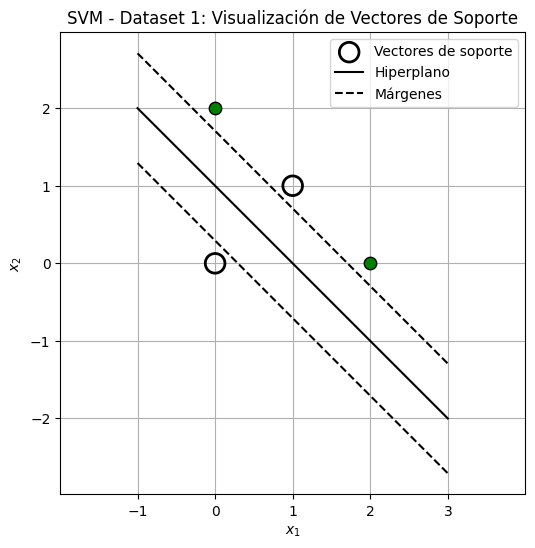

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Dataset 1
X = np.array([
    [0, 0],  # x1, -1
    [2, 0],  # x2, +1
    [0, 2],  # x3, +1
    [1, 1]   # x4, +1
])
y = np.array([-1, +1, +1, +1])

# Entrenamiento
clf = SVC(kernel='linear', C=1e10)
clf.fit(X, y)

# Extraer información del modelo
w = clf.coef_[0]
b = clf.intercept_[0]
support_vectors = clf.support_vectors_
# Imprimir el valor de C
print("El valor de C en clf: ")
print(clf.C)  # Salida: 10 a la 10

# Gráfico
plt.figure(figsize=(6, 6))
colors = ['red' if label == -1 else 'green' for label in y]

# Puntos normales
for i, point in enumerate(X):
    if not any(np.allclose(point, sv) for sv in support_vectors):
        if np.allclose(point, [1, 1]):
            plt.scatter(*point, c='green', edgecolors='black', s=180, label='$x_4$: no soporte', marker='*', zorder=4)
        else:
            plt.scatter(*point, c=colors[i], edgecolors='k', s=80, zorder=3)

# Vectores de soporte
plt.scatter(support_vectors[:, 0], support_vectors[:, 1],
            facecolors='none', edgecolors='black', s=200, linewidths=2, label='Vectores de soporte', zorder=5)

# Hiperplano y márgenes
xx = np.linspace(-1, 3, 100)
yy = -(w[0]*xx + b)/w[1]
margin = 1 / np.linalg.norm(w)
yy_plus = yy + margin
yy_minus = yy - margin

plt.plot(xx, yy, 'k-', label='Hiperplano')
plt.plot(xx, yy_plus, 'k--', label='Márgenes')
plt.plot(xx, yy_minus, 'k--')

# Estética
plt.title("SVM - Dataset 1: Visualización de Vectores de Soporte")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.grid(True)
plt.axis('equal')
plt.legend()
plt.show()
